# 弱监督学习综述

谈及半监督学习以及pu learning这类比较小众的机器学习领域，就不得不提到周志华大佬之前发表的综述：《A brief introduction to weakly supervised learning》，关于这篇经典文章的翻译百度上已经有很详细的了，这里不赘述：https://academic.oup.com/nsr/article/5/1/44/4093912

为什么我们需要弱监督学习？

    1、现实的数据往往缺乏标签；

    2、数据标注过程的高成本；

    3、很多任务很难获得如全部真实标签这样的强监督信息；

弱监督学习主要分为几类以及定义是什么？

通常来说，弱监督可以分为三类，

    1、不完全监督（incomplete supervision），即，只有训练集的一个（通常很小的）子集是有标签的，其他数据则没有标签。这种情况发生在各类任务中。例如，在图像分类任务中，真实标签由人类标注者给出的。从互联网上获取巨量图片很容易，然而考虑到标记的人工成本，只有一个小子集的图像能够被标注或者是A卡的用户有很多会先被风控引擎等切掉一部分，导致这部分样本无法拥有好坏用户的标签。

    2、不确切监督（inexact supervision），即，图像只有粗粒度的标签，这在tabular数据中也较为常见，例如社交网络用户，给这个用户打标签，用户可能是多标签的，但是在标注的过程中仅标注了一个大范围的标签。

    3、不准确的监督（inaccurate supervision），模型给出的标签不总是真实的。出现这种情况的常见原因有，图片标注者的食物，或者某些图片就是难以分类，评分卡的定义都是比较明确的，而在反欺诈、异常检测的应用中，样本的标注往往是模糊的

弱监督学习是一个总括性的术语，涵盖了尝试通过较弱的监督来学习并构建预测模型的各种研究。关于弱监督学习和传统的有监督学习以及上述的三种弱监督的类别可见：

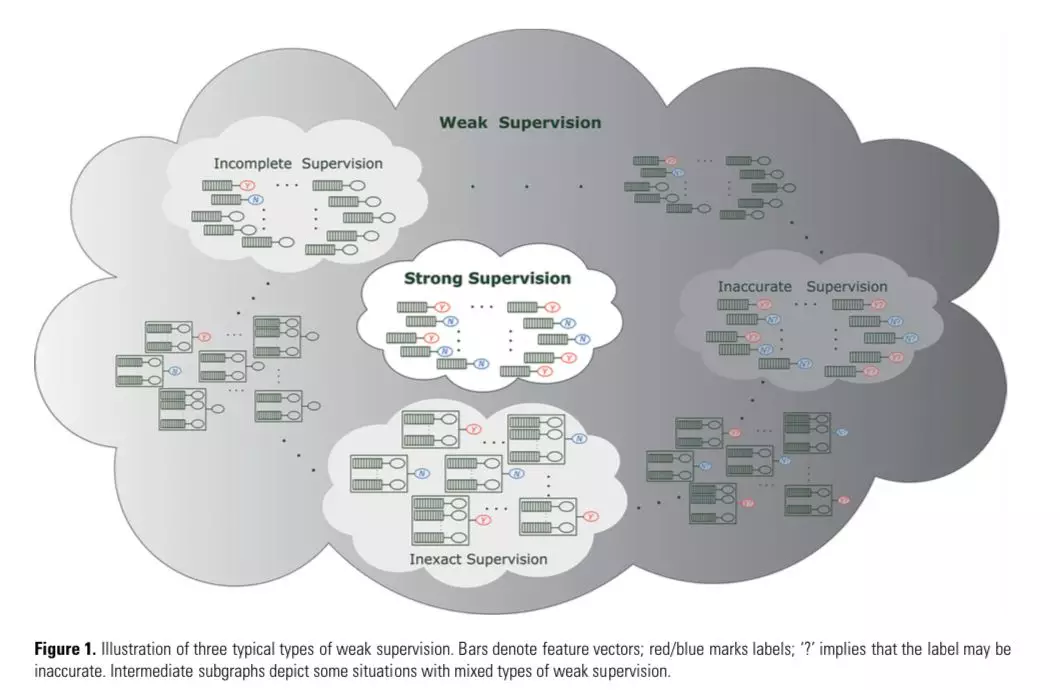

# 不完全监督

不完全监督考虑那些我们只拥有少量有标注数据的情况，这些有标注数据并不足以训练出好的模型，但是我们拥有大量未标注数据可供使用。形式化表达为，模型的任务是从训练数据集：
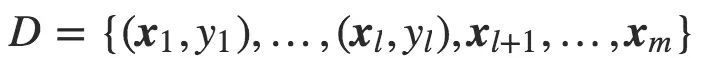
中学习，其中有l个样本是有标注的，还有m-l个样本是无标注的，如果m-l=0则转化为普通有监督问题，如果l=0则转化为普通无监督问题

不完全监督主要包含了两个方向：

1、active learning 主动学习，大体的思路是未标记数据通过人工专家等方法来进行查询与标注，得到了新的标签信息之后模型继续迭代，这样的过程一直重复下去，最终使得人类的经验知识越来越丰富，模型的泛化性能也越来越好，人机交互，各自活得较好的收益，当然主动学习也是一块比较大的领域，涉及到的技术细节还是非常多的，这里暂时不做深入介绍了；

2、semi-supervised learning 半监督学习，按照学习方式又可以分为纯（pure）半监督学习与直推学习（transductive learning），关于二者的区别需要注意，直推学习（transductive learning）实际上属于另一个更大的概念，它和归纳学习（Inductive Learning）属于两种相对的学派。

归纳学习强调的是从大量的样本中学习到潜在的规律，然后去预测未知的样本，基于“开放世界”的假设，即模型进行学习的时候不知道未来要预测的示例是什么，我们常见的逻辑回归、gbdt、nn等等都是基于这样的“开放世界”假设；

直推学习（transductive learning）则是基于“封闭世界”的假设，模型在学习的过程中已经知道未来要预测的示例是什么样的。直推学习理论的鼻祖——Vapnik认为，经典的归纳学习假设期望学得一个在整个样本分布上具有低错误率的决策函数，这实际上把问题复杂化了，因为在很多情况下，人们并不关心决策函数在整个样本分布上的性能怎么样，而只是期望在给定的要预测的样本上达到最好的性能。后者比前者简单，因此，在学习过程中可以显式地考虑测试样本从而更容易地达到目的。


从基于两种学习方式的算法的使用方法层面上来说：
直推式半监督中只包含有标签样本集和测试样本集，且测试样本也是无标签样本。直推式半监督算法先将测试样本视为无标签样本，然后利用有标签样本和无标签样本训练模型，并在训练过程中预测无标签样本。因此，直推式半监督算法只能处理当前的无标签样本（测试样本），不能直接进行样本外的扩展。对于新的测试样本，直推式半监督算法需要重新训练模型才能预测其标签。

归纳式半监督算法除了使用有标签样本集和无标签样本集外，还使用独立的测试样本集。归纳式半监督算法能够处理整个样本空间中的样本。归纳式半监督算法在有标签样本和无标签样本上训练学习模型。该模型不仅可以预测训练无标签样本的标签，还能直接预测新测试样本的标签。


因为和我们后面要介绍的拒绝推断关系密切的是半监督学习，所以上述仅作为一个知识的系统整理和理解，了解半监督学习在机器学习领域的位置，下面我们详细了解一下半监督学习；

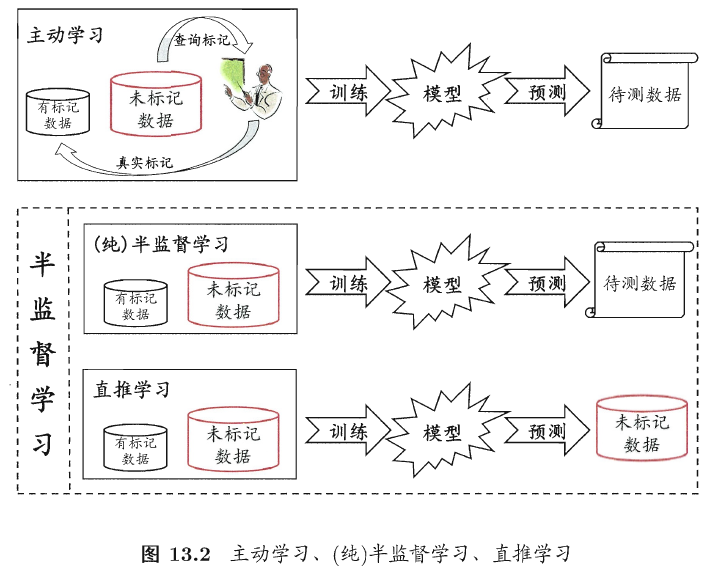

值得一提的是，这几年cv、nlp的兴起带动了迁移学习的飞速发展，从而使得迁移学习几乎成为了完全独立的一门学科，实际上，迁移学习和半监督学习所做的事情非常类似，都是通过一些特定的手段来为有监督或无监督等学习服务，类似于一个“打辅助的”。


# 半监督学习的发展史：



## self-training，即自我训练，也称之为伪标签技术

和后面会补充的pu-learning的一些算法思路很类似，其基本思路就是，在已标记的数据上训练，然后对未标注数据进行预测，取预测置信度最高的样本直接对其进行标签定义，然后将这类样本纳入当前训练样本中继续训练，直到模型的预测结果不再发生变化





如果是分类问题：选择预测概率最有把握的样本的标签作为真实的标签（例如概率未0.99或者概率未0.01的预测标签），将预测然后将得到的有标注的数据加入原始数据继续进行训练，再预测，一直到达停止条件（例如大部分甚至全部unlabeled的样本都被打上了标签），此时，我们就把未标注的样本通过这种方式标注出来了；

如果是回归问题，则进行第一轮预测，将预测结果作为新的标签，然后将unlabeled和labeled的数据合并进行训练，再进行第二次预测，计算两次预测的结果中，unlabeled数据的误差情况，取误差最小的部分样本直接进行标签的定义，最后按照上述的思路反复迭代一直到误差收敛为止，此时，我们就把未标注的样本通过这种方式标注出来了；

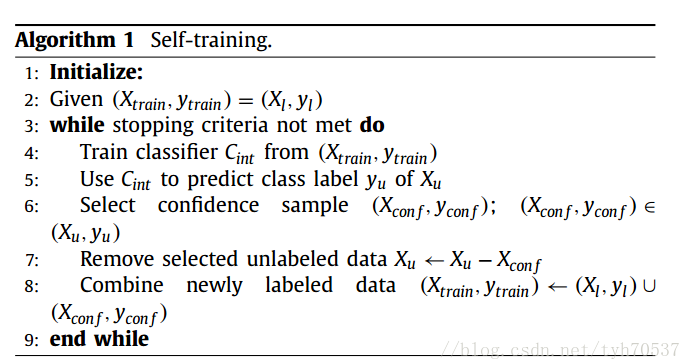

伪标签技术目前在竞赛中尤其是nlp、cv比赛中还是会有不少选手使用到的技巧，作为一种数据增强的手段来提高模型的泛化能力，而在结构化数据中的应用相对较少，这类方法的问题主要在于对于初始模型的精度要求较高，如果初始模型的精度本身就比较差则不适用于使用这种技术；

## 直推学习（transductive learning）的提出
我们在不完全章节已经详细介绍了直推学习和纯半监督学习以及整个无监督、有监督学习的区别，纯半监督、有监督、无监督都是基于归纳学习的思想，和直推学习的思想完全不同。我们常见的word2vec、deepwalk、node2vec等等实际上都属于直推学习的范畴，例如word2vec无法直接针对oov单词进行embedding，node2vec也无法直接针对于unseen nodes进行embedding

## 半监督学习开始得到一些应用，
例如利用 EM 算法结合高斯混合模型或者多项式分布模型的半监督学习技术，但是由于很难利用未标记数据对训练诸如前馈神经网络等当时主流学习技术进行提高，所以半监督学习研究在那个时候没有能够迅速发展开来

## 半监督学习的思想与方法被应用于文本等特定领域并逐渐发展
实际上到今天，文本领域的比赛中仍旧有“伪标签”这一半监督学习的基本概念与技巧

# 半监督学习的意义及其基本假设

半监督学习是否有意义？更准确地说：与只使用标记数据的监督算法相比，是否可以期望通过考虑未标记的点，从而有一个更准确的预测？原则上答案是“Yes”。然而，有一个重要的先决条件： 未标记数据必须是有意义的，具有潜在价值的样本而非无用的噪声样本等；

在半监督学习中三大基本假设：

    （1）平滑假设(Smoothness Assumption)：位于稠密数据区域的两个距离很近的样例的类标签相似，也就是说，当两个样例被稠密数据区域中的边连接时，它们在很大的概率下有相同的类标签；相反地，当两个样例被稀疏数据区域分开时，它们的类标签趋于不同。具体的含义可见下图：

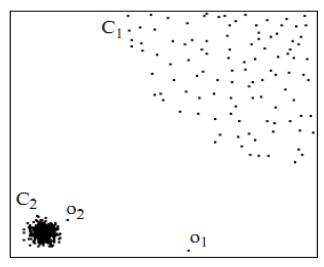   

    所谓稠密数据区域，即样本之间的距离都比较接近，如左下图，而稀疏数据如点O1，虽然O1看起来和左下的样本比较接近，但我们不能像聚类或者knn那样以距离的相对远近作为评价直接将其划归为其中一类；

    (2) 聚类假设（Cluster assumption）： 如果样本点在同一簇中，它们很可能属于同一类。实际上聚类假设属于平滑假设的一个特例，在平滑假设中，样本不一定要形成明显的簇，例如整个样本空间都是稠密且均匀的，此时就没有了聚类的簇的概念，当样本空间中形成明显的簇时，聚类假设则派上用场；

    (3)流形假设（Manifold assumption）：首先我们需要知道当特征的维度非常高的时候会出现维度诅咒的问题，即，在高维空间，距离度量的计算失效，此时密度和距离的概念趋于无效，则上述两大假设难以成立，而流形假设主要内容即假定如果高维样本恰好可以映射到一个低维的流形结构上，此时在低维的流型空间中，前两大假设仍旧是可以成立的。关于流形学习的概念这里仅作简单介绍，展开来讲又是一块儿复杂独立的知识了：

    流形学习（manifold learning）是机器学习、模式识别中的一种方法，在维数约简方面具有广泛的应用。它的主要思想是将高维的数据映射到低维，使该低维的数据能够反映原高维数据的某些本质结构特征。流形学习的前提是有一种假设，即某些高维数据，实际是一种低维的流形结构嵌入在高维空间中。流形学习的目的是将其映射回低维空间中，揭示其本质。以下图为例[1]，左边是一个三维数据的分布，右边是降低到二维后的结果。我们可以发现二维的数据更能直观地表示其流形结构，并且保留了三维空间的结构关系（不同颜色代表了不同区域）

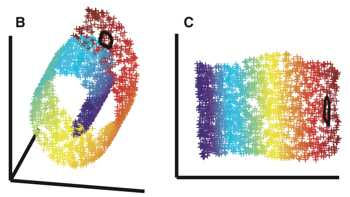

# 半监督学习的算法介绍:

## self training 自训练（重点）

我们前面提到的self training，实际上是一种数据增广的方式，基学习器可以使用配置不同，但是只有当初始和后续的类别正确的标记了绝大多数样本时，才能通过迭代改进分类的精度，否则，你使用性能很差的分类模型或者回归模型只会预测出大量错误的标签，从而使得模型在迭代的过程中“错上加错”，然而，即使是高精度的模型，也会不可避免的添加错误的标记噪音，在实际应用中，使用更准确地信任度量（例如99%或者0.01%的阈值）和预定义地置信度阈值来限制错误标记地样本的数量,对于回归问题，我们可以使用多次交叉验证之后取回归预测值的标准差作为衡量，标准差越小则置信度越高。
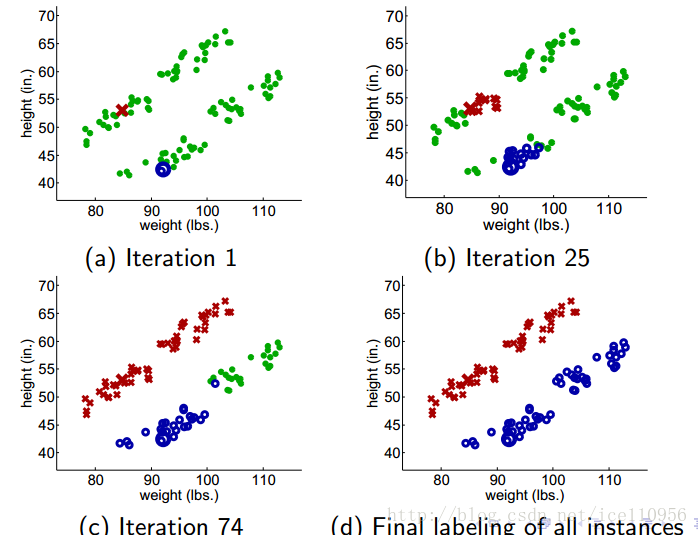

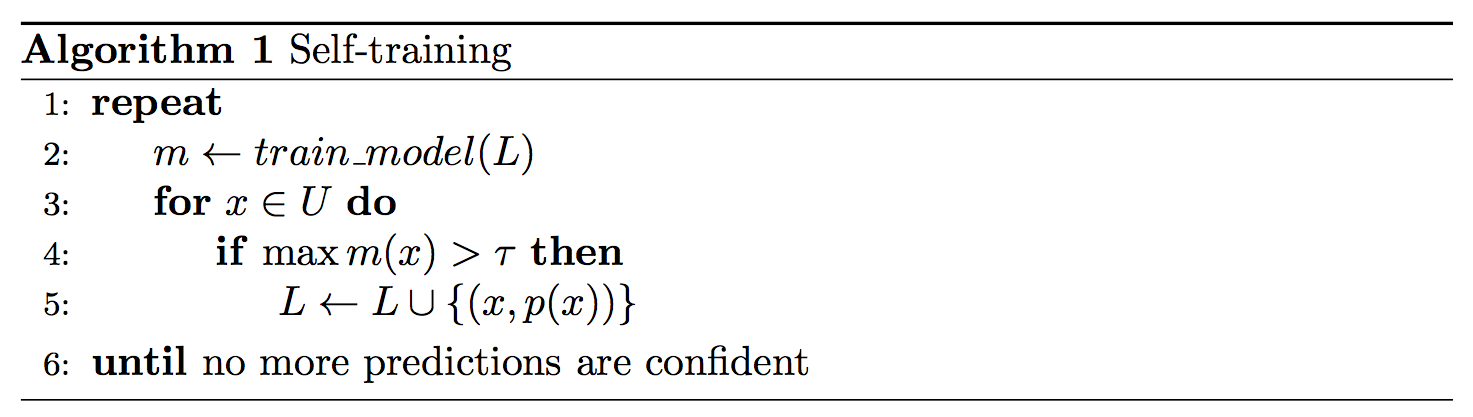

除此之外，伪标签技术的衍生，软标签技术从另一个角度提出了一种self traning的思路，主要针对于分类问题，其思路也不复杂，就是根据概率对样本的权重进行定义，例如在二分类问题中，我们对样本A预测的概率为0.4与0.6，则我们将A当作两个样本，标签为0的样本其权重为0.4，标签为1的样本其权重为0.6，而后加入原始的数据进行训练和迭代直到收敛或达到预先定义的停止条件为止

## 生成式半监督模型



判别式模型（Discriminative Model）是直接对条件概率p(y|x;θ)建模，我们目前所熟知的逻辑回归、gbdt、神经网络等主流算法都属于判别式模型，这里x代表数据，θ代表模型的参数，y代表标签。

生成式模型（Generative Model）则会对x和y的联合分布p(x,y)建模，然后通过贝叶斯公式来求得p(yi|x)，最后选取p(yi|x)最大时对应的yi，贝叶斯公式如下：
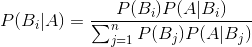
朴素贝叶斯、混合高斯、隐马尔可夫、贝叶斯网络等相对冷门的这些算法都属于生成式模型。

而生成式半监督模型本质上还是一个生成式模型，即先对x和y的联合分布p(x,y)建模，然后通过贝叶斯公式来求得p(yi|x)，然后选取p(yi|x)最大时对应的yi，无论是生成式模型还是生成式半监督模型重要的地方都在于 p(x,y)，即联合分布，常由人工主观来确定，例如我们假设数据符合混合高斯分布则会使用混合高斯的联合分布概率密度作为待求解生成式模型方程然后带入数据求解，因此这类方法往往都需要一定的的较强的领域先验知识来假设数据服从的潜在的分布是哪一种分布，错误的分布假设只会带来更加错误的结果；

简而言之，基于生成式模 型的方法假设所有数据均由相同的生成式模型产生，借助模型参数将未标记数据与学习目标联系起来，通常利用 EM 算法根据极大似然来估计模型参数，典型的例子就是半监督版的高斯混合模型。

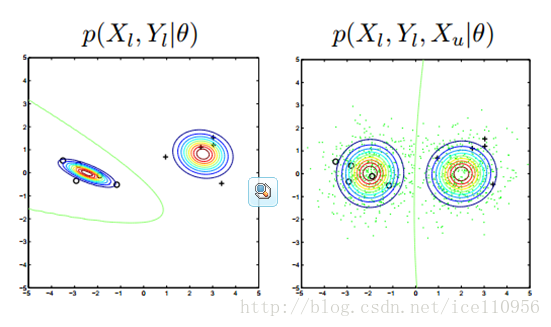

## 低密度分离



以S3VM，半监督支持向量机为代表，TSVM为代表，其核心思想是：尝试为无标签样本找到合适的标签，使得超平面划分后的间隔最大化。TSVM采用局部搜索的策略来进行迭代求解，即首先使用有标签样本集训练出一个初始SVM，接着使用该学习器对未标记样本进行预测与达标，这样所有样本都有了标记，并基于这些有标记的样本重新训练SVM，易出错样本不断进行调整，可以看到，其思路大体上和self training是类似的。

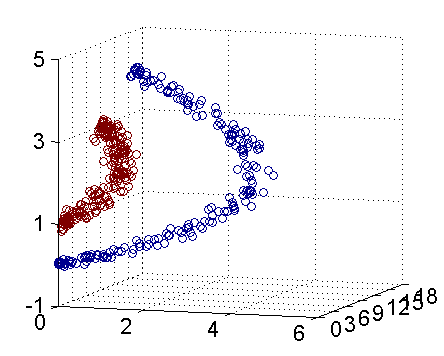

简而言之，半监督SVM方法通过调整SVM的超平面和未标记数据的标记指派，使得SVM在所有训练数f包括有标记和未标记数据上最大化间隔 （Margin)

## 基于图的算法

GNN、GCN以及知识图谱的兴起，带动了一波学习图算法的热潮，图算法中的社区发现算法系列中的标签传播算法是很典型的半监督学习算法，利用已知标签预测未知标签。

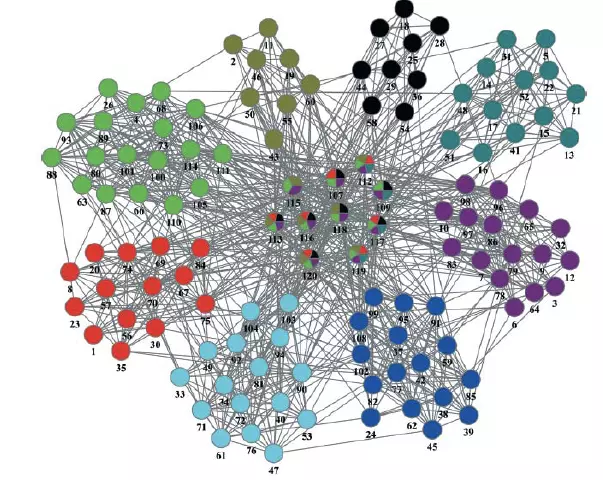

## 基于分歧的方法（重点）


即通过使用多个学习器来对未标记数据进行利用，在学习过程中将未标记数据作为多学习器间信息交互的平台，从而达到一个协同训练的目的。而基于分歧的方法整体又可以分为：多视图学习和单视图学习

### 多视图学习


所谓多视图学习，其概念类似于多源异构网络的多源的概念，即，一个数据集可以包含多个属性集，举个例子，例如，一幅图像可由图像本身的可视信息来描述，也可由其关联的文字信息来描述，这时可视信息所对应的属性集合就形成了关于图像的一个视图 而文字信息对应的属性集合则形成了另一个 视图；再如，一张网页可以由其本身包含的信息来描述，也可以由其他网页指向它的超链接所包含的信息来描述 ，两者对应的属性集合分别形成了关于网页的两个视图。
多视图学习又可以分为下面三类

#### 协同训练（co-training）的多视图学习

基于分歧的半监督学习的起源 、也是最著名的代表性方法 一 “协同训练法（co-training）”，即是针对多视图学习提出的，协同训练法要求数据具有两个充分冗余且满足条件独立性的视图，“充分 （Sufficient)” 是指每个视图都包含足够产生最优学习器的信息， 此时对其中任一视图来说 ，另 一个视图则是“冗 余 (Redundant)”的；同时，对类别标记来说这两个视图条件独立，协同训练法 的学习过程非常简单：首先分别在每个视图上利用有标记样本训练一个分类器然后，每个分类器从未标记样本中挑选若干标记 置信度 f即对样本赋予正确标记的置信度)高的样本 进行标记，并把这些 “伪标记 fPseudo—labeled)”样 本即其标记是由学习器给出的，加入另一个分类器的训练集中，以便对方利用这些新增的有标记样本进行更新 。这个“互相学习 、共同进步”的过程不断迭代进行下去，直到两个分类器都不再发生变化，或达到预先设定的学习轮数为止。
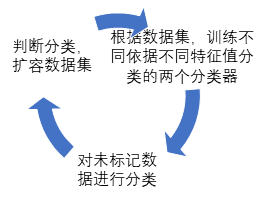

#### 协同正则法(Co—regularization)

协同正则法是受协同训练法的启发提出的基于正则化框架的方法，它试图直接最小化有标记样本上的错误率和两个视图上未标记样本的标记不一致性．与协同训练法不同的是，协同正则法中不涉及对未标记样本赋予伪标记的过程．该方法有多种算法实现。相关资料较少，不做详细介绍。

#### 协同EM法(Co-EM)

除此之外，另外一个多视图半监督学习算法Co-EM，该方法使用在一个视图中学习的模型来概率性的标记另一个模型中未标记的数据。直观的，Co-EM在每个视图中使用EM算法 ，并在每次EM迭代之前互换每个视图中预测的概率标签。Co-EM被认为是Co-Training的概率版本，因为两种算法都是基于相同的思想：他们使用在一个视图中获得的知识，以未标记示例的软类标签的形式来训练另一个视图。两种算法之间的主要区别在于：Co-EM不会提交前一次迭代中预测的标签，因为它使用的概率标签可能会在迭代的过程中改变。另外，Co-Training添加到训练集中的数据后面不会再被访问到，因此它有可能会在训练集中添加大量的错误标记的示例。


Co-Training被应用在那些无法自然地把特征分割为两个视图的领域。Nigam和Ghani（理论提出与奠基人）研究了视图之间的独立性对协同训练的影响，研究结果表明，如果两个视图独立协同训练的效果明显优于随机生成的两个视图。尤其是，当协同训练的两个视图真正完全独立时，协同训练的结果比EM算法还要好。另外，如果数据集中有较多的冗余，随机切分和自然切分得到的两个视图在协同训练中的性能相当。当然，无法保证随机切分生成的视图之间相互独立。

Feger 和 Koprinska 提出了 maxInd来把特征切分为两个视图。该方法的目标是最小化两个特征子集之间的依赖性，使用条件互斥信息condMI来度量其依赖性。结果表示为一个无向图，每个叶节点表示特征，叶节点之间连接的权重为这两个特征的CondMI。图建立完成之后，接下来就需要把这个图切分为两个特征数相同的互不连接的子图。为了最小化两个子图之间的依赖性，切分的时候需要最小化切割掉的边的权重之和。他们发现maxInd并不优于随机分裂，一个可能的原因是：协同训练对于每个视图内部的特征之间的依赖性 (intra-dependence) 十分敏感，随机分裂的内部依赖性低于maxInd和自然独立分裂。他们的研究表明，每个视图的内部依赖性与视图之间的相互依赖性之间存在权衡，最小化相互依赖性会导致最大化每个视图的内部依赖。此外，因为CondMI仅仅基于少量的有标签数据训练得到，因此使用CondMI衡量特征之间的依赖性并不精确。

Sakaheldim 和 EI Gayar 提出了一种新的为Co-Training分割特征子集的方法，并且将其和已有的人工分割和自然分割进行对比。第一个特征分割准则基于最大化视图的视图的置信度，第二个准则是要同时最大化视图的置信度和独立性，使用条件互斥信息度量视图的依赖性。对于每个视图，使用有标签数据训练一个分类器，分类器对于测试数据平均熵代表这个视图的置信度。他们的实验结果表明，使用混合的特征分割标准比使用单独的标准更好。最后，他们提出了基于最大化视图多样性的第三个标准。在前面提出的三个准则的基础上，他们使用遗传算法来优化适应度函数。在两个数据集上的实验结果表明，他们提出的分割方法优于随机分割。（说了半天，也就比随机分割效果好一点，不实用）

#### 多视图学习的缺陷

上述方法大多假设充分冗余视图满足条件独立性，然而遗憾的是，视图的条件独立性假设通常并不成立；更严峻的问题是，虽然不少应用任务中的数据具有多视图，但它们未必是充分视图，此时是否可学习、如何有效地学习，在理论上仍有待探讨。另一方面，大多数现实任务只拥有一个属性集，即单视图数据，此时基于多视图的方法难以使用。

### 单视图学习

因为假设太强并且大多数时候数据仅仅有一个视图的数据源，所以相对来说，单视图学习更具有普遍性的意义，单视图学习初期诞生了一些算法，但是因为存在各种问题没有普及开来，后来诞生了三体训练法。

所谓的三体训练法，就是从单视图训练集中产生三个分类器 ，然后利用这三个分类器以“少数服从多数”的形式来产生伪标记样本 例如，若两个分类器将某个未标记样本预测为正类，而第三个分类器预测为反类，则该样本被作为伪标记正样本提供给第三个分类器进行学习．由此，该方法避免了对标记置信度的显式估计．然而，某些情形下，多数分类器的预测结果可能是错误的，此时，从少数分类器的角度看，它收到的是有“标记噪音”的样本．受 Goldman 和 Zhou（三体训练理论的发明人）的启发，三体训练法基于 Angluin 和 Laird关于标记噪声学习的理论结果，导出了“少数服从多数”所需满足的条件，在学习中的每一轮， 只需判断该条件是否成立，即可决定是否基于伪标记样本进行分类器更新；直观上来说，该结果表明在一定条件下积累的标记噪声可利用大量未标记数据进行补偿．最终训练完成后，三个分类器通过投票机制作为一个分类器集成进行使用．值得指出的是，最初的三个分类器必须强于弱学习器，并且具有较大的分歧即差异)；这可以通过Bootstrap采样机制阐述类似于集成学习中的 Bagging方法．该方法的另一个好处是，可以容易地推广到三视图数据上。

由于三体训练法不需多视图、不对基学习器有特定要求，算法实现简单、便于应用，因此和协同训练法成为基于分歧的半监督学习方法中最常用的技术，有时也被并称为 Co—tri-training。

因为三体训练法自身的优势，后来得到了数据科学家的推广，以使用更多的分类器。后来在此基础上诞生了协同森林法Co—Forest，该方法以随机森林的方式产生多个分类器，然后使用“少数服从多数”的形式来为少数学习器产生伪标记样本．由于使用多个分类器，分类器问的差异很难保持，因此，在算法实现上协同森林法使用了多种差异引入机制来减缓学习过程的“早熟”。可以看出，三体训练法和协同森林法同时利用 了半监督学习和集成学习机制，从而获得了学习性能的进一步提升。Hady和 Schwenker进 一 步对利用多视图或多个不同学习器的思想进行拓展，提出了利用分歧分类器集成进行半监督学习的 Co-BC 框架．值得指 出的是虽然半监督学习和集成学习均致力于提升泛化性能，但二者的研究方法论有较大差别，因此长期处于独立发展状态．上述工作显示出二者可相互联系，Zhou进一步指出两者互有助益，而基于分歧的半监督学习自然成为半监督学习与集成学习研究之间的桥梁。

早期的半监督 学习研究聚焦在分类任务上，虽然回归通常与分类并列为预测学习的两大任务，但半监督回归一直缺乏资料其主要原因之一是半监督学习中常用的聚类假设在回归任务上不成立，而 回归任务中的标记置信度估计较为 困难．Zhou和 Li首先对半监督回归进行研究，提出了协同回归法 (COREG)．该方法在算法实现上基于不同的距离度量与／或不同的 k值产生不同的近邻回归学习器，然后基于预测一致性来挑选标记置信度高的样本赋予伪回归标签；其基本思路是，标记置信度越高的样本越有可能被赋予真实的标记，而具有真 实标记的样本应能较一致地体现出回归的内在规律 因此，被回归学习器以高置信度标记的样本应是使该回归学习器与训练集更一致的样本．该方法可容易地推广到多视图数据上。

后续关于多视图、单试图等学习方式的理论证明就不详细展开了，感兴趣的可以自行查阅 周志华大佬的原论文《基于分歧的半监督学习》

# 半监督学习在实际应用中存在的问题：

    1、无标签样本的有效利用问题。
    我们上述使用的各类半监督学习算法在训练阶段都没有太多考虑无标签样本的质量问题，如果无标签样本的质量比较差甚至是完全不同分布的数据，那么很容易反而降低模型的泛化性能；


    2、大量无标签样本的高效使用问题。

    半监督算法的计算复杂度、提升性能的效果以及可扩展性、易用性等都是在实际的工程中要考虑的问题，例如上面所说的TSVM，SVM本身的计算效率就不高，基于半监督不断进行迭代与收敛会使得整个算法的运行时间特别长，而且，就目前风控以lr和gbdt为主的情况下，TSVM难以扩展到这两个算法上面来。


    3、特征选择中的有效性问题。

    可以看到，很多半监督的算法都有无监督的影子，即在没有标签的情况下使用各种奇怪的套路，比如标签传播算法，所以和无监督一样，这类有监督算法对于特征的选择非常的敏感，如果你的特征有很多的辣鸡特征，那么基本，没法用。


#  近几年深度半监督学习的发展

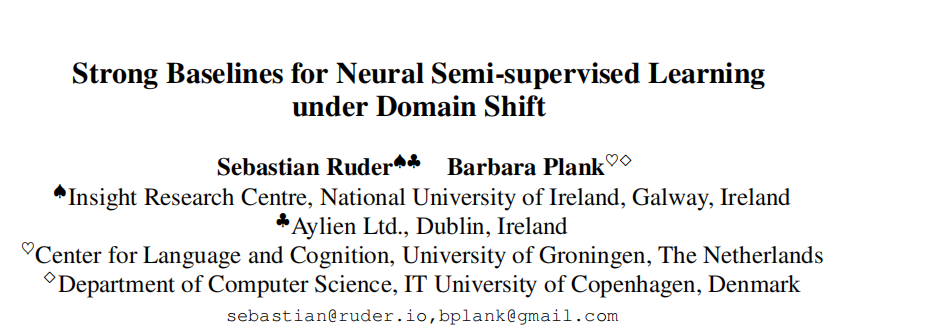

深度学习这几年的飞速发展，同样也带动了半监督学习+深度学习理论的发展，上面是一篇不错的18年的综述，细数了近几年深度半监督学习领域的发展(目前了解的)，包括google的号称超强的半监督算法mixmatch和uda也是针对图像问题设计的，图像的增广可以旋转、平移等，因为图像对这些变换具有不变性，但结构化数据没办法这么增广，比如用户的年龄、性别很难通过类似的方式来进行增广，所以就不详细描述了

## self-training

这部分之前已经提到过了，然后是后来的一些变体，首先，在迭代的过程中正负样本的比例可能是不断变化的，所以我们难以确定固定的阈值来作为好坏客户的判定，解决的思路是使用rank，即取预测概率最高的部分样本，然后是nn或者lr这类算法可以使用 在线学习的模式来迭代更新权重系数，因此天然的适用于self training的模式，在小数据集上，通过不断的self-training达到使得标注数据得到收敛后效果惊人的不错，除此之外，大型数据集上挑选良好的特征然后再使用这种思路也取得了一些不错的效果。

## Tri-training

    前面已经介绍过最初的tri-training了，后续改进了：
    1、Tri-training with disagreement，如果两模型预测概率都很高，第三个模型就不用预测了，直接当作正确的标签，简单来说就是前二者也并不是太确定的标签放第三个模型里训练，思想就是在薄弱点进行提升；

    2、因为tri-training的计算复杂度很高，三个模型互相进行训练与迭代，费时，所以后来又提出对未标记样本进行采样；

    3、为了提高模型的多样性引入了boostrap的思路，包括后续的co-forest等等都是基于类似的思路，通过对原始数据进行行列采样来期望得到尽量多样化的学习器

## 多任务学习

未深入研究其思想

## 其它

深度半监督的相关研究还有不少，但是重大的进展很多集中在文本和图像上，除此之外，很多半监督的算法也是基于nn本身的特性设计的，难以应用到lr或者gbdt这类传统的机器学习模型上，例如mixmatch和uda，半监督学习在cv领域的state of art，目前暂未深入研究并尝试应用到tabular数据上来

# pu-learning

Positive-unlabeled learning，是半监督学习的一个重要分支，指的是只有一个类别进行了标注，另一个类别的标注非常稀少甚至没有，相对于我们之前讨论的半监督学习算法所面对的问题更加棘手，因为在另一类样本数量稀少的情况下面临严重的不均衡学习问题，在另一类样本标注稀少的情况下几乎没有办法进行有效的训练，例如好用户100000个，坏用户只标注了5个，我们其实根本不可能从不均衡学习的层面去考虑这样的问题，样本数量太稀少，根本不可能刻画出坏客户的真实分布情况，除此之外，有时候甚至没有标注那么根本没有办法进行有监督学习的训练。

## 为什么要使用pu learning？

    1、我们前面提到过的，某类样本标注稀少（比如负类数据难以获取或者难以判断等原因）的情况下普通的半监督难以实施的情况下，需要使用pu learning 来处理；


    2、负类数据太过多样化，也就是潜在的负类样本可能是多个类别的，例如一个用户的的状态如果是正常那么正常的情况只有一种，但如果不正常则可能是各种各样的异常。


    3、负类数据动态变化的情况下，（举个例子帮助理解，可能不准确）例如欺诈检测中，好用户的基本特征都差不多，但是欺诈分子的行为模式可能会随着时间不断的变化，在这一点上pu learning和one class classification的概念有一些类似。

    4、pu-learning 相对于其它的半监督学习来说扩展性和易用性要好得多，因为很多标准的机器学习算法稍作改造就可以实现pu learning形式的模型



# pu learning的基本假设

一、打标机制：
1. 完全随机选择（Selected Completely At Random，SCAR）;有标签样本完全是从正样本分布中随机选择的，且与本身的特征属性无关。

2. 随机选择（Selected At Random，SAR）;有标签样本是从正样本分布中随机选择的，但与本身的特征属性有关。

3. 概率差距（Probabilistic Gap）;正负预测概率差距越大，被选中打标的概率也就越大，直观上看就是预测概率接近1或者0.01等这类预测置信度很高的样本优先作为选择



二、数据假设

    1、负向性（Negativity）：假设所有无标签样本都属于负类。
    2、分隔性（Separability）：假设正负样本自然存在间隔。
    3、平滑性（Smoothness）：假设相似的样本具有相同的标签，如果两个样本相似，那么预测概率评分也是基本一致的，不会存在跃变的情况。


# 如何使用pu learning？

## PU两步法：

    1、
    训练一个正样本和unknown样本的标准分类器。
    得到一个确定的正样本的分数范围来标记确定的负样本。

    2、
    在新标记的数据集上重新训练分类器，反复重复这个过程，直到收敛或达到实前置定的最大迭代次数或迭代时间。

乍看之下，pu两步法其实就是在做self traning，实际的应用中pu的方式更近一步：

1、结合了spy间谍法，思路并不复杂，从有标签的正样本中抽取部分放入unknown数据集作为spy样本，在剩下的样本中进行模型训练然后将得到的模型用于预测所有unknown样本与部分spy样本，预测的结果中凡是概率高于spy样本的即认为是正样本，实际上就是引入spy作为一种更合理的打标方法；

2、1-DNF技术 暂时未研究透彻

## 简单分类法，即直接将未标注的样本当正样本进行训练

这是早期最朴素的pu learning的算法思路之一了，通常正样本的预测概率高于负样本，如果未标注样本中预测的样本概率高的则有可能是未标注的正样本，那么我们就直接将其定义为正样本，简单分类法实际上就是self traning的迭代次数为1时的特殊情况

## pu bagging

    随机抽取unknown数据的子集和所有正样本，创建一个子训练集，
    用这个“bootstrap”数据集构建一个分类器，将正样本视为1，将unknown视为0
    预测在训练中没有被采样的unknown样本的概率分数，称为袋外样本(OOB)
    重复多次，计算OOB的平均分

pu learning在正样本占比少的情况下效果还是有一定保证的，这和word2vec中利用负采样的思路是类似的，只要能够保证正样本在unknown数据集中的占比非常小，那么进行负采样采样到相同标签样本的可能性就会比较低，所以如果本身正负样本的占比是相近的，这类方法就会引入过多的标签噪声了；

# 拒绝推断

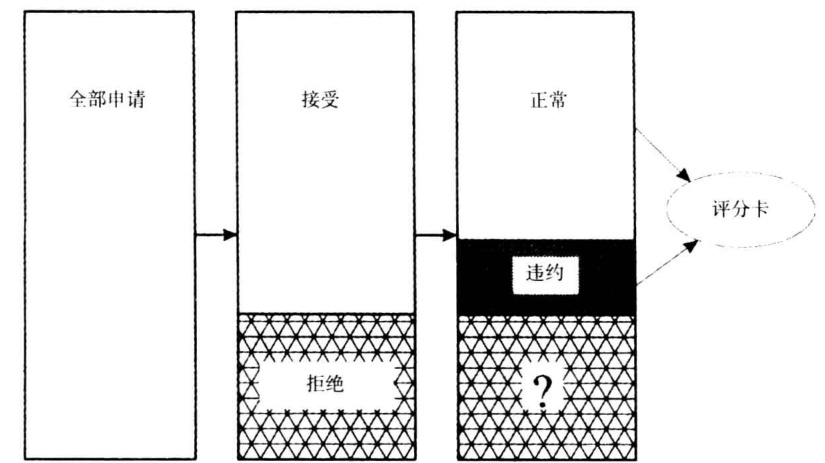

在建立信用评分模型时，我们使用的样本往往只占了所有申请样本的一部分，在上一版的模型中被拒绝的用户没有被纳入到评分卡建模的数据集中，导致样本数据是非随机性缺失的，因此建模数据是存在偏差的，所有有必要利用推断预测这些被拒绝客户的好/坏标签，一并纳入到建模数据集中，这就是信用评分中的拒绝推断（Reject Inference）。这种样本数据在应用时会导致参数估计偏误，建立的评分模型预测时产生的偏差称为拒绝偏差。除此之外，申请者未开户或者账户未被使用，此时，申请用户和不存在没有区别，因为我们也没有他的任何表现信息或者一些评分规则事项又去掉了一部分，总之真正入模型的样本被削减了不少。

## 为什么我们需要拒绝推断（也称为拒绝演绎）？

1、显然，如果能够准确合理的推断未知数据的标签，则能够带来更多有标签的用户数据，更多的有效数据==更好的泛化性能，更稳定的模型表现；

2、评估拒绝样本的状态，并且使得模型能够在全局样本的分布情况下进行训练（尽量使得训练样本和未来预测样本分布类似，如果二者分布不相似则很容易引入模型偏差），使得训练样本对应的客群和未来的待预测样本对应的客群对齐。

3、评分卡因为其自身的特性，如果不进行拒绝推断，永远都是在优质中的用户寻找更优质的用户，最终建模的客群可能越来越少，模型的对好坏客户的区分度会越来越差，因为原始样本中的坏客户越来越少。

4、通过拒绝推断能够挖掘出一些被拒绝的好用户，可以带来额外的收益；


## 什么时候我们需要拒绝推断？

1、一般如果产品是高通过率的时候么有必要进行拒绝推断，例如10000个人申请通过了9500个，通过率95%，则入模样本和原始样本的分布差异一般不会很大（因为用户的数量差异性很低），所以拒绝推断常用于中低通过率的情况，需要注意的是，我们事先经过风控引擎被筛选的用户是不需要也不能考虑进来的，例如黑名单命中规则、法院有案底，年龄太大或太小，这类用户在实际预测的时候也是一样会被排除在外的，所以不影响这里的模型偏差；

2、历史数据与当前数据的分布发生巨大变化，例如政策突然宽松或者突然收紧导致目标客群发生变化的情况；

## 如何使用拒绝推断

拒绝推断的方式有很多，下面一一介绍传统的一些方法。不同书籍或者文章等对于拒绝推断的界定方法都不太一样，这里按照红宝书《信用评分工具》中给的定义来

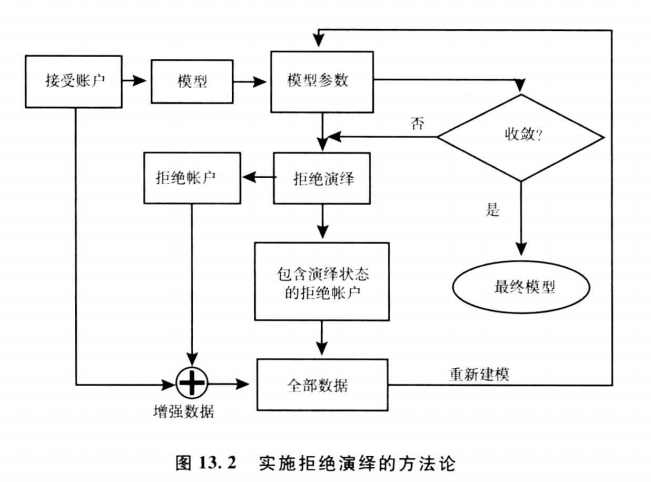

### 随机补充法

#### 被拒绝的都当作坏客户

这种情况仅适用于好坏客户判定的置信水平很高并且高通过率的情况

#### 随机赋值

保证好坏客户比例与审批通过率一致的情况下进行随机赋值

### 展开法

#### 等权（简单展开）

使用开发的模型对拒绝用户进行预测，设定一个划分阈值，高于该阈值的为好客户，否则为坏客户，阈值的选择应该使被拒绝用户整体的坏客户占比高于接受账户的2~5倍，拒绝用户的权重为1和入模用户是一样的，只不过根据阈值进行了硬截断

#### 模糊权重法

使用开发的模型对拒绝用户进行预测，得到预测值，将拒绝用户以带权的形式加入原始数据，例如某个客户预测的概率为0.90，则其划分为0.9权重的坏样本和0.1权重的好样本加入入模样本中进行训练。

A客户 预测概率为0.99，那么这个我们就得到了两条样本：

A客户 标签为 1  样本权重0.99

A客户 标签为 0  样本权重0.01

#### 重新加权法

使用开发的模型对全部用户进行预测，得到预测概率值，对概率值进行等频分箱，计算每个分箱中的：
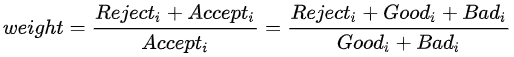
然后对接受样本使用上面计算出来的weight进行加权，其思路就是通过re-weight来使得整体的分布接近 入模用户+拒绝用户的全量用户的分布情况。

### 打包法

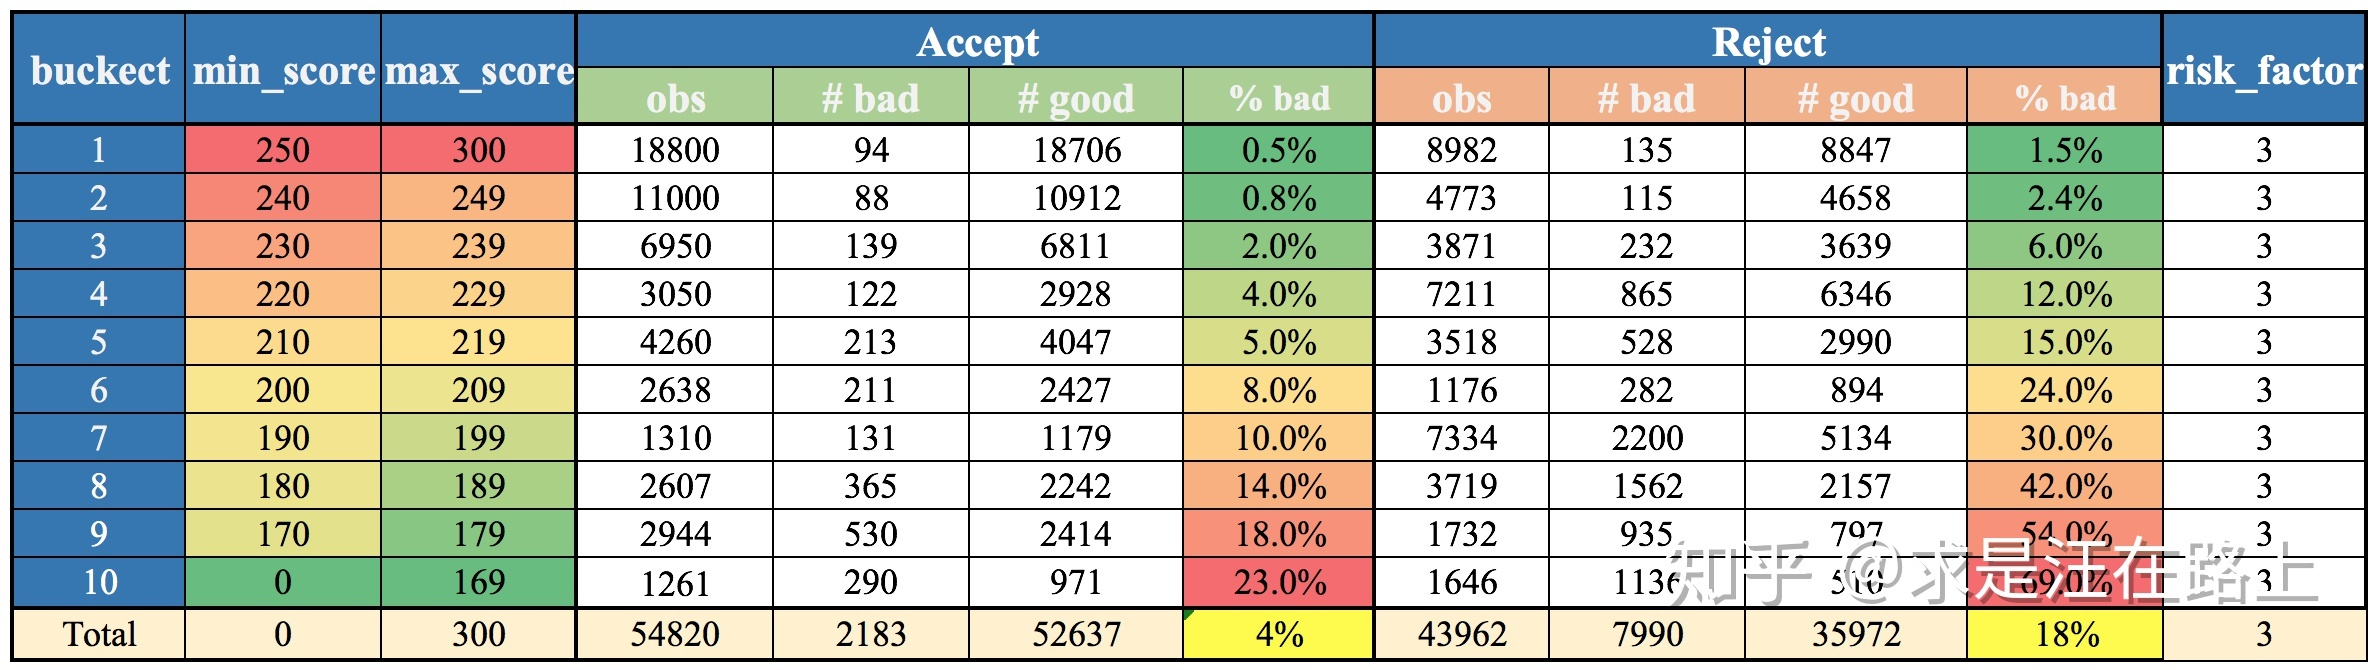

思路也很简单，使用开发的模型对拒绝用户进行预测，预测值分箱，然后保证每一个区间中的坏客户占比总体比接受用户的坏客户占比高一个风险系数，上图取的风险系数是3，一般是2~5

#### 迭代重新分类

思路类似于我们上面介绍的经典的self training的方法，首先根据开发的模型以打包法的方式来推断拒绝样本的结果，然后建立好坏模型，然后确定相同拒绝率的临界点，比如我们原来拒绝了30%的用户，那么在全量数据上训练的模型阈值划分之后也要拒绝30%的用户，一直重复这个过程直到达到预先设定的停止条件或者某些指标不在发生显著变化，例如 logloss，接受和拒绝用户中的用户好坏比里收敛、评分结果的频率分布不再发生明显变化等

### 其它的一些方法



#### 小批量测试（下探）

在某一段时间内，接受所有申请，等待用户有了表现后，用这部分数据直接建模。这是最准确的方法，拒绝客群的好坏标签不再需要推断，而是直接得到用户最真实的贷后表现。但是此方法需要承受较大的坏账损失。


#### 借助外部数据赋值

通过外部数据，为拒绝样本打上好坏标签。比如发现用户在其他机构发生过违约行为，那么这样的拒绝样本可以直接标记为坏。值得注意的是，其他机构的业务必须和要拒绝推断样本的产品相同或者相似。因为信用评分模型是衡量用户的还款意愿和还款能力。用户在大额产品上还款困难，并不意味着在小额产品上也没有还款能力。但是，该方法需要花费一定的数据成本，并且有些外部数据较难获取。


## 如何评价拒绝推断带来的效果？

最简单直接的；

1、 观察模型的平均auc，ks值；

2、关注特征的iv值变化；

3、拒绝用户与接受用户的好坏比例是否合理；

4、上线后做AB test等等

# 应用案例

## bigmart的销售预测：使用self training提高模型的预测能力

拒绝推断的数据场景实际上就是非常典型的半监督学习所面对的场景，因此，我们之前提到过的半监督学习算法和pu learning的方法都可以拿来尝试能否提升模型效果，网上的半监督数据集不太多，这里我们以 bigmart数据集为例，通过超市的特征信息预测超市的销量

### self-training

In [170]:
import os
import random
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import *
from utils.semi_supervised import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

In [131]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(123)

In [77]:
train = pd.read_csv('.\data\Train.csv')
test = pd.read_csv('.\data\Test.csv')

简单的预处理

In [78]:

train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)
test['Item_Weight'].fillna((test['Item_Weight'].mean()), inplace=True)


train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['low fat','LF'], ['Low Fat','Low Fat']) 
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['reg'], ['Regular']) 
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['low fat','LF'], ['Low Fat','Low Fat']) 
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['reg'], ['Regular'])


train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year'] 
test['Outlet_Establishment_Year'] = 2013 - test['Outlet_Establishment_Year'] 


train['Outlet_Size'].fillna('Small',inplace=True)
test['Outlet_Size'].fillna('Small',inplace=True)


col = ['Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Fat_Content']
test['Item_Outlet_Sales'] = 0
combi = train.append(test)
number = LabelEncoder()
for i in col:
    combi[i] = number.fit_transform(combi[i].astype('str'))
    combi[i] = combi[i].astype('int')
train = combi[:train.shape[0]]
test = combi[train.shape[0]:]
test.drop('Item_Outlet_Sales',axis=1,inplace=True)

## removing id variables 
training = train.drop(['Outlet_Identifier','Item_Type','Item_Identifier'],axis=1)
testing = test.drop(['Outlet_Identifier','Item_Type','Item_Identifier'],axis=1)
y_train = training['Item_Outlet_Sales']
training.drop('Item_Outlet_Sales',axis=1,inplace=True)

features = training.columns
target = 'Item_Outlet_Sales'

X_train, X_test = training, testing

D:\anaconda\envs\ml_gpu\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [132]:
model_factory = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
]

for model in model_factory:
    model.seed = 42
    num_folds = 5

    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')
    score_description = " %0.2f (+/- %0.2f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)

    print('{model:25} CV-5 RMSE: {score}'.format(
        model=model.__class__.__name__,
        score=score_description
    ))

LGBMRegressor             CV-5 RMSE:  1109.82 (+/- 48598.07)
XGBRegressor              CV-5 RMSE:  1083.26 (+/- 34737.98)


不使用半监督学习的情况下，两种主流算法的rmse如上图，考虑到我们主要学习的对象是半监督学习的算法，所以调参、特征工程等等这里就都不做了

self-training（即伪标签技术）的功能实现在utils里，算法原理很简单大家看一下上面说的原理解释就行

In [133]:
from utils.semi_supervise import *

In [135]:
model_factory = [
    xgb.XGBRegressor(nthread=1),
    
    PseudoLabeler(
        xgb.XGBRegressor(nthread=1),
        test,
        features,
        target,
        sample_rate=0.3,
        n_iterations=5,
        use_mean=True
    ),
]

for model in model_factory:
    model.seed = 42
    num_folds = 5
    
    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
    score_description = "MSE: %0.4f (+/- %0.4f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)

    print('{model:25} CV-{num_folds} {score_cv}'.format(
        model=model.__class__.__name__,
        num_folds=num_folds,
        score_cv=score_description
    ))

XGBRegressor              CV-5 MSE: 1083.2585 (+/- 34737.9823)
PseudoLabeler             CV-5 MSE: 1082.7500 (+/- 37538.4320)


In [138]:
model_factory = [
    xgb.XGBRegressor(nthread=1),
    
    PseudoLabeler(
        xgb.XGBRegressor(nthread=1),
        test,
        features,
        target,
        sample_rate=0.3,
        n_iterations=1,
        use_mean=True
    ),
]

for model in model_factory:
    model.seed = 42
    num_folds = 5
    
    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
    score_description = "MSE: %0.4f (+/- %0.4f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)

    print('{model:25} CV-{num_folds} {score_cv}'.format(
        model=model.__class__.__name__,
        num_folds=num_folds,
        score_cv=score_description
    ))

XGBRegressor              CV-5 MSE: 1083.2585 (+/- 34737.9823)
PseudoLabeler             CV-5 MSE: 1082.3550 (+/- 35158.4948)


In [140]:
model_factory = [
    xgb.XGBRegressor(nthread=1),
    
    PseudoLabeler(
        xgb.XGBRegressor(nthread=1),
        test,
        features,
        target,
        sample_rate=0.3,
        n_iterations=5,
        use_mean=False
    ),
]

for model in model_factory:
    model.seed = 42
    num_folds = 5
    
    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
    score_description = "MSE: %0.4f (+/- %0.4f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)

    print('{model:25} CV-{num_folds} {score_cv}'.format(
        model=model.__class__.__name__,
        num_folds=num_folds,
        score_cv=score_description
    ))

XGBRegressor              CV-5 MSE: 1083.2585 (+/- 34737.9823)
PseudoLabeler             CV-5 MSE: 1082.2095 (+/- 36824.9475)


In [139]:
model_factory = [
    lgb.LGBMRegressor(),
    
    PseudoLabeler(
        lgb.LGBMRegressor(),
        test,
        features,
        target,
        sample_rate=0.3,
        n_iterations=1,
        use_mean=False
    ),
]

for model in model_factory:
    model.seed = 42
    num_folds = 5
    
    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
    score_description = "MSE: %0.4f (+/- %0.4f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)

    print('{model:25} CV-{num_folds} {score_cv}'.format(
        model=model.__class__.__name__,
        num_folds=num_folds,
        score_cv=score_description
    ))

LGBMRegressor             CV-5 MSE: 1109.8194 (+/- 48598.0700)
PseudoLabeler             CV-5 MSE: 1106.7405 (+/- 43910.4886)


In [141]:
model_factory = [
    lgb.LGBMRegressor(),
    
    PseudoLabeler(
        lgb.LGBMRegressor(),
        test,
        features,
        target,
        sample_rate=0.3,
        n_iterations=5,
        use_mean=True
    ),
]

for model in model_factory:
    model.seed = 42
    num_folds = 5
    
    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
    score_description = "MSE: %0.4f (+/- %0.4f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)

    print('{model:25} CV-{num_folds} {score_cv}'.format(
        model=model.__class__.__name__,
        num_folds=num_folds,
        score_cv=score_description
    ))

LGBMRegressor             CV-5 MSE: 1109.8194 (+/- 48598.0700)
PseudoLabeler             CV-5 MSE: 1103.6461 (+/- 46926.7199)


In [142]:
model_factory = [
    lgb.LGBMRegressor(),
    
    PseudoLabeler(
        lgb.LGBMRegressor(),
        test,
        features,
        target,
        sample_rate=0.3,
        n_iterations=5,
        use_mean=False
    ),
]

for model in model_factory:
    model.seed = 42
    num_folds = 5
    
    scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
    score_description = "MSE: %0.4f (+/- %0.4f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)

    print('{model:25} CV-{num_folds} {score_cv}'.format(
        model=model.__class__.__name__,
        num_folds=num_folds,
        score_cv=score_description
    ))

LGBMRegressor             CV-5 MSE: 1109.8194 (+/- 48598.0700)
PseudoLabeler             CV-5 MSE: 1107.3619 (+/- 47606.9416)


可以看到，使用了伪标签技术（self-training）之后，rmse都下降了，效果得到了提升,并且使用不同的超参数设置会有不同的结果

In [153]:
sample_rates = np.linspace(0, 1, 10)

def pseudo_label_wrapper(model):
    return PseudoLabeler(model, test, features, target)

# List of all models to test
model_factory = [
    xgb.XGBRegressor(),
]

# Apply the PseudoLabeler class to each model
model_factory = map(pseudo_label_wrapper, model_factory)

# Train each model with different sample rates
results = {}
num_folds = 5

for model in model_factory:
    model_name = model.get_model_name()
    print('%s' % model_name)

    results[model_name] = list()
    for sample_rate in sample_rates:
        model.sample_rate = sample_rate
        
        # Calculate the CV-3 R2 score and store it
        scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error', n_jobs=8)
        results[model_name].append(np.sqrt(scores.mean()*-1))

XGBRegressor


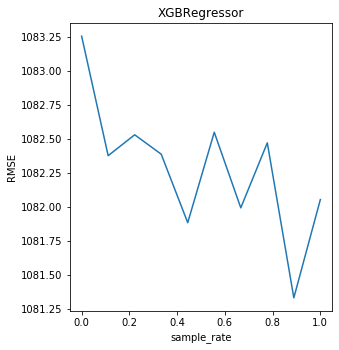

In [154]:
plt.figure(figsize=(16, 18))

i = 1
for model_name, performance in results.items():    
    plt.subplot(3, 3, i)
    i += 1
    
    plt.plot(sample_rates, performance)
    plt.title(model_name)
    plt.xlabel('sample_rate')
    plt.ylabel('RMSE')
    

plt.show()

可以看到，在不同的采样比例下，半监督xgb的表现也不同，当采样率为0.9的时候，半监督xgb的表现最佳

## kaggle credit card 使用 经典的co-training

In [187]:
data=pd.read_csv('.\data\creditcard.csv')

In [188]:
X=acard.iloc[0:142404]
X_test=acard.iloc[142404:284808]
y=X.pop('Class')
y_test=X_test.pop('Class')
X_labelled,X_unlabelled,y_labelled,y_unlabelled=train_test_split(X,y,test_size=0.5) 

baseline的auc为0.9681(xgboost)左右

和0.9572(lightgbm)

In [200]:
print ('xgboost')
base_xgb = xgb.XGBClassifier(class_weight='balanced')
base_xgb.fit(X_labelled,y_labelled)
y_pred = base_xgb.predict_proba(X_test)[:,1]
print (roc_auc_score(y_test, y_pred))

xgboost
0.9681320242703778


In [201]:
print ('lightgbm')
base_lgb = lgb.LGBMClassifier(class_weight='balanced')
base_lgb.fit(X_labelled,y_labelled)
y_pred = base_lgb.predict_proba(X_test)[:,1]
print (roc_auc_score(y_test, y_pred))

lightgbm
0.9572142020441468


### co-training协同训练法

需要注意的是，在实战的时候我们往往是没有多视图数据的，所以一般来说通过将原始的特征进行对等分割，通过将不同的特征分割开来从而模拟创建两个“视图”，再进行双模型的协同训练。当然，具体怎么去做切分是个技术活，我们可以考虑不同源的数据做不同的视图，例如用户的基本信息做一个视图，用户的行为信息做一个视图等等

In [202]:
cols=X_labelled.columns
X1,X2=cols[0:15],cols[15:30]
tp=-1*np.ones(y_unlabelled.shape[0])

In [205]:
X_labelled['y']=y_labelled.values
X_unlabelled['y']=tp
Xs=pd.concat([X_labelled,X_unlabelled])

In [207]:
ys=Xs.pop('y')

对于unlabeld的数据，其标签设置为-1，然后与有标签数据合并之后进行训练

In [219]:
print ('xgb,lgb CoTraining')
co_clf = CoTrainingClassifier(xgb.XGBClassifier(gpu_id=0,class_weight='balanced'),lgb.LGBMClassifier(class_weight='balanced'))
co_clf.fit(Xs[X1].values, Xs[X2].values, ys)
y_pred = co_clf.predict_proba(X_test[X1].values, X_test[X2].values)[:,1]
print (roc_auc_score(y_test, y_pred))

xgb,lgb CoTraining
0.9709435459504058


In [222]:
co_clf.predict_proba(X_test[X1].values, X_test[X2].values)

array([[9.99966478e-01, 3.35166733e-05],
       [6.44070107e-02, 9.35592989e-01],
       [9.99911159e-01, 8.88357290e-05],
       ...,
       [9.99898574e-01, 1.01418204e-04],
       [9.99932208e-01, 6.77979773e-05],
       [9.99923735e-01, 7.62766922e-05]])

可以看到，泛化能力得到了提高，当然。。。实际应用没这么简单，毕竟这是demo。。。